Import NLTK, a platform for builidng python networks to work with human language data


In [ ]:
import nltk

In [ ]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

Input your text

In [ ]:
text = "NLTK is a leading platform for building Python programs to work with human language data. It provides easy-to-use interfaces to over 50 corpora and lexical resources, along with a suite of text processing libraries for classification, tokenization, stemming, tagging, parsing, and semantic reasoning"
text

'NLTK is a leading platform for building Python programs to work with human language data. It provides easy-to-use interfaces to over 50 corpora and lexical resources, along with a suite of text processing libraries for classification, tokenization, stemming, tagging, parsing, and semantic reasoning'

Performed Sentence and word tokenization, to split texts into individual sentences and texts into individual words

In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize
# Sentence Tokenization
sentences = sent_tokenize(text)
print("Sentences:", sentences)

# Word Tokenization
words = word_tokenize(text)
print("Words:", words)

Sentences: ['NLTK is a leading platform for building Python programs to work with human language data.', 'It provides easy-to-use interfaces to over 50 corpora and lexical resources, along with a suite of text processing libraries for classification, tokenization, stemming, tagging, parsing, and semantic reasoning']
Words: ['NLTK', 'is', 'a', 'leading', 'platform', 'for', 'building', 'Python', 'programs', 'to', 'work', 'with', 'human', 'language', 'data', '.', 'It', 'provides', 'easy-to-use', 'interfaces', 'to', 'over', '50', 'corpora', 'and', 'lexical', 'resources', ',', 'along', 'with', 'a', 'suite', 'of', 'text', 'processing', 'libraries', 'for', 'classification', ',', 'tokenization', ',', 'stemming', ',', 'tagging', ',', 'parsing', ',', 'and', 'semantic', 'reasoning']


Made a visul analysis

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt

In [ ]:
word_freq = Counter(words)
print(word_freq)


Counter({',': 6, 'a': 2, 'for': 2, 'to': 2, 'with': 2, 'and': 2, 'NLTK': 1, 'is': 1, 'leading': 1, 'platform': 1, 'building': 1, 'Python': 1, 'programs': 1, 'work': 1, 'human': 1, 'language': 1, 'data': 1, '.': 1, 'It': 1, 'provides': 1, 'easy-to-use': 1, 'interfaces': 1, 'over': 1, '50': 1, 'corpora': 1, 'lexical': 1, 'resources': 1, 'along': 1, 'suite': 1, 'of': 1, 'text': 1, 'processing': 1, 'libraries': 1, 'classification': 1, 'tokenization': 1, 'stemming': 1, 'tagging': 1, 'parsing': 1, 'semantic': 1, 'reasoning': 1})


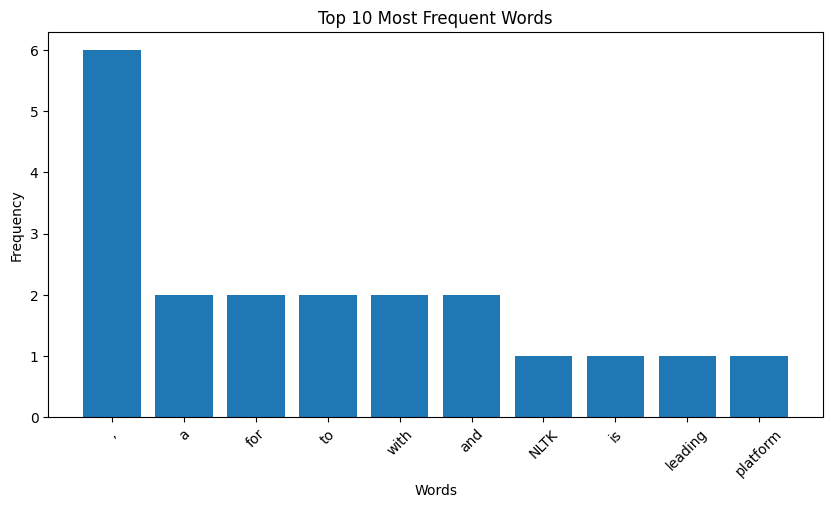

In [ ]:
# Plot the most common words
most_common = word_freq.most_common(10)

# Split into two lists for plotting
labels, values = zip(*most_common)

plt.figure(figsize=(10,5))
plt.bar(labels, values)
plt.title("Top 10 Most Frequent Words")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()


Performed cleaning by removing Stop words and punctuations that could interfere with tokenization

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
tokens = word_tokenize(text.lower())  # Convert to lowercase

# Define stopwords and punctuation
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)

# Remove stopwords and punctuation
clean_words = [word for word in tokens if word not in stop_words and word not in punctuation]

print("Cleaned Words:", clean_words)

Cleaned Words: ['nltk', 'leading', 'platform', 'building', 'python', 'programs', 'work', 'human', 'language', 'data', 'provides', 'easy-to-use', 'interfaces', '50', 'corpora', 'lexical', 'resources', 'along', 'suite', 'text', 'processing', 'libraries', 'classification', 'tokenization', 'stemming', 'tagging', 'parsing', 'semantic', 'reasoning']


Performed Stemming to reduce words to their base stems , this helps in grouping different forms of the same words

In [ ]:
from nltk.stem import PorterStemmer

# Initialize the stemmer
stemmer = PorterStemmer()

# Apply stemming
stemmed_words = [stemmer.stem(word) for word in clean_words]

print("Stemmed Words:", stemmed_words)


Stemmed Words: ['nltk', 'lead', 'platform', 'build', 'python', 'program', 'work', 'human', 'languag', 'data', 'provid', 'easy-to-us', 'interfac', '50', 'corpora', 'lexic', 'resourc', 'along', 'suit', 'text', 'process', 'librari', 'classif', 'token', 'stem', 'tag', 'pars', 'semant', 'reason']


lemmatization to reduce words to their base or dictionary form (lemma) so that different forms of a word are treated as the same, improving the efficiency and accuracy of text analysis.

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import pos_tag

# Function to map NLTK POS tags to WordNet POS tags
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # default to noun

# Lemmatizer
lemmatizer = WordNetLemmatizer()

# Assuming you already have your clean token list (e.g., clean_words)
# Example:
# clean_words = ['running', 'better', 'computers', 'easily']

# POS tagging
pos_tags = pos_tag(clean_words)

# Lemmatize with POS info
lemmatized_words = [lemmatizer.lemmatize(word, get_wordnet_pos(tag)) for word, tag in pos_tags]

print("Lemmatized Words:", lemmatized_words)


Lemmatized Words: ['nltk', 'lead', 'platform', 'building', 'python', 'program', 'work', 'human', 'language', 'data', 'provide', 'easy-to-use', 'interface', '50', 'corpus', 'lexical', 'resource', 'along', 'suite', 'text', 'processing', 'library', 'classification', 'tokenization', 'stem', 'tag', 'parse', 'semantic', 'reasoning']


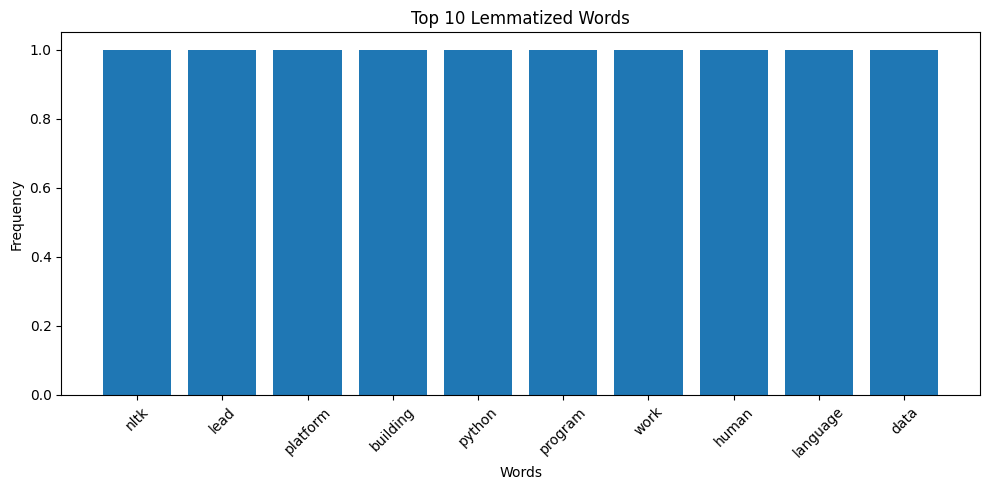

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

# Count word frequencies
freq = Counter(lemmatized_words)
most_common = freq.most_common(10)  # top 10 words

# Split into labels and values
labels, values = zip(*most_common)

# Plot
plt.figure(figsize=(10,5))
plt.bar(labels, values)
plt.title("Top 10 Lemmatized Words")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
